Import Statements

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from ast import literal_eval

## Importing Dataset

In [2]:
samples = pd.read_csv('../../../data/updated_wos/wos.complete.csv')
# samples = samples.drop('Unnamed: 0', axis=1)
display(samples)

,paper_id,category,year,keywords,cited_by
0,10.1109/AICAS54282.2022.9869942,MLAccelerator,2022,learning physical performance accelerator pote...,0
1,10.1109/FCCM51124.2021.00037,MLAccelerator,2021,structure information proprietary instruction ...,2
2,10.1109/CCGrid.2015.114,MLAccelerator,2015,learning applications accelerator services wid...,9
3,10.1109/ICECCS54210.2022.00031,MLAccelerator,2022,accelerators learning convolution framework in...,0
4,10.1109/DAC56929.2023.10247935,MLAccelerator,2023,systems component complexity increasing critic...,0
...,...,...,...,...,...
13816,10.1063/1.4795280,SpikingNN,2013,resistive presents electronic dependent design...,1
13817,10.3389/finsc.2022.818449,SpikingNN,2022,underlying activation transitions activity qua...,0
13818,10.1109/ITIME.2009.5236247,SpikingNN,2009,function model understand structures integrati...,0
13819,10.1016/j.neunet.2017.04.010,SpikingNN,2017,learning spiking methods performance sequence ...,7


In [3]:
display(samples.nsmallest(3, 'year'))

,paper_id,category,year,keywords,cited_by
846,NaN,MLAccelerator,0,NaN,0
10690,10.1007/BF00593116,SpikingNN,1971,NaN,0
10838,10.1073/pnas.86.20.7871,SpikingNN,1989,NaN,4


In [5]:
samples = samples.drop(samples[(samples.year < 1972) | (samples.year > 2022)].index)

Text(0, 0.5, 'Machine Learning Hardware Publication Count')

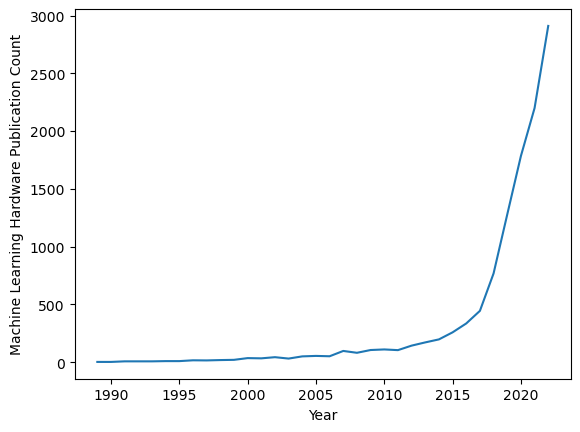

In [210]:
yr_counts = samples['year'].value_counts().sort_index()
plt.plot(yr_counts)
plt.xlabel('Year')
plt.ylabel('Machine Learning Hardware Publication Count')

In [161]:
electricity = pd.read_csv('../../../data/computation/electricity_end_use.csv')
electricity = electricity[electricity.Description == 'Electricity End Use, Total'] # we will look at total electricity end-use
electricity['YYYYMM'] = electricity['YYYYMM'].astype(str)
electricity['YYYY'] = electricity.YYYYMM.str[:4]
electricity = electricity.drop(electricity[((electricity.YYYY).astype(int) < 1972) | ((electricity.YYYY).astype(int) > 2022)].index)
electricity['Value'] = electricity['Value'].astype(float)
electricity['annual end use'] = electricity.groupby('YYYY')['Value'].transform('sum')
electricity.drop_duplicates('YYYY', inplace=True)
electricity.reset_index()
electricity = electricity.drop('Column_Order', axis=1)
electricity = electricity.drop('MSN', axis=1)
electricity = electricity.drop('YYYYMM', axis=1)
# 2023 only has 11 months
electricity.YYYY = pd.to_datetime(electricity['YYYY'], format='%Y')
# electricity = electricity.drop(4784)
display(electricity)

,Value,Description,Unit,YYYY,annual end use
4133,1595160.691,"Electricity End Use, Total",Million Kilowatthours,1972-01-01,1595160.691
4134,144505.194,"Electricity End Use, Total",Million Kilowatthours,1973-01-01,3425817.562
4147,143986.102,"Electricity End Use, Total",Million Kilowatthours,1974-01-01,3411847.452
4160,149394.254,"Electricity End Use, Total",Million Kilowatthours,1975-01-01,3494181.254
4173,160538.972,"Electricity End Use, Total",Million Kilowatthours,1976-01-01,3710492.188
4186,172350.883,"Electricity End Use, Total",Million Kilowatthours,1977-01-01,3896722.424
4199,176649.000,"Electricity End Use, Total",Million Kilowatthours,1978-01-01,4035844.000
4212,185387.000,"Electricity End Use, Total",Million Kilowatthours,1979-01-01,4142198.000
4225,179585.000,"Electricity End Use, Total",Million Kilowatthours,1980-01-01,4188898.000
4238,191949.087,"Electricity End Use, Total",Million Kilowatthours,1981-01-01,4294205.725


In [212]:
yr_counts = yr_counts.to_frame()
yr_counts = yr_counts.reset_index()
yr_counts = yr_counts.rename(columns={'index':'year','year':'count'})
for i in range(1972,1989):
    yr_counts = yr_counts.append({'year':i,'count':0},ignore_index=True)
yr_counts = yr_counts.set_index('year')
yr_counts = yr_counts.sort_index()
display(yr_counts)

,count
year,
1972,0
1973,0
1974,0
1975,0
1976,0
1977,0
1978,0
1979,0
1980,0


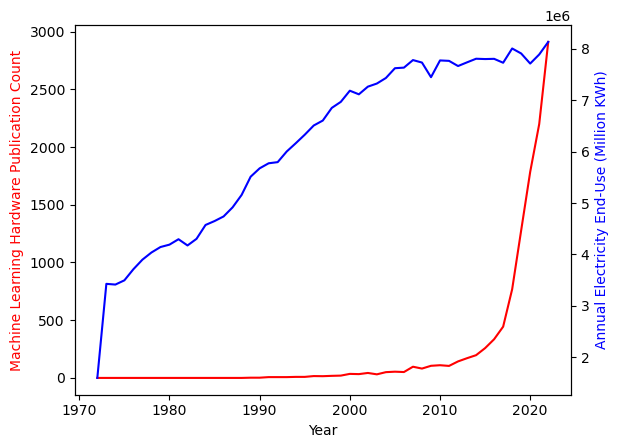

In [220]:
years = electricity['YYYY']

fig, ax1 = plt.subplots()
ax1.plot(years,yr_counts,color='r')
ax1.set_xlabel('Year')
ax1.set_ylabel('Machine Learning Hardware Publication Count',color='r')
ax2 = ax1.twinx()
ax2.plot(years,electricity['annual end use'],color='b')
ax2.set_ylabel('Annual Electricity End-Use (Million KWh)',color='b')
plt.show()

In [198]:
compute = pd.read_csv('../../../data/computation/systems_compute.csv')
compute = compute[['System','Training compute (FLOP)','Publication date']]
compute = compute.dropna()
compute.columns = [c.replace(' ', '_') for c in compute.columns]
compute.rename({'Training_compute_(FLOP)': 'Training_compute_FLOP'}, axis=1, inplace=True)
compute.Publication_date = pd.to_datetime(compute['Publication_date'], format='%Y-%m-%d')
display(compute)

,System,Training_compute_FLOP,Publication_date
3,KEPLER,124000000000000000000,2020-11-23
7,Wu Dao - Wen Yuan,650280960000000000000,2021-01-11
8,iGPT-L,8.91e+21,2020-06-17
9,VD-LSTM+REAL Large,21300000000000000,2016-11-04
19,GPT,17578125000000000000,2018-06-01
...,...,...,...
1395,Cerebras-GPT-13B,2.3e+22,2023-04-06
1399,GBERT-Large,2.24446464e+21,2020-10-21
1400,BERT-Large-CAS (PTB+WT2+WT103),521000000000000000000,2019-04-20
1402,ERNIE-Doc (247M),29100000000000000000,2020-12-31


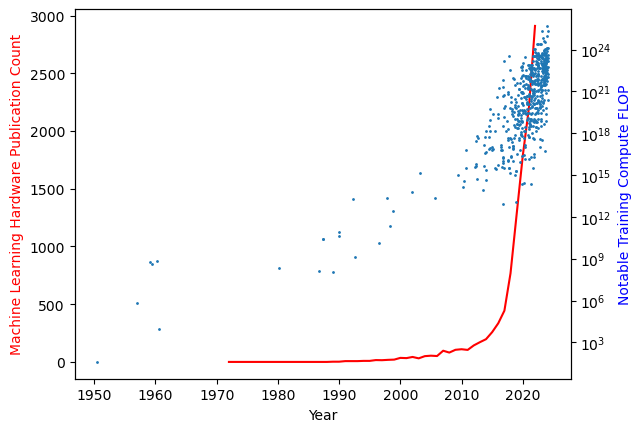

In [219]:
compute['Training_compute_FLOP'] = compute['Training_compute_FLOP'].astype(float)
fig, ax1 = plt.subplots()
ax1.plot(years,yr_counts,color='r')
ax1.set_xlabel('Year')
ax1.set_ylabel('Machine Learning Hardware Publication Count',color='r')
ax2 = ax1.twinx()
ax2.set_yscale("log")
# ax2.scatter(years,compute['Training_compute_FLOP'],color='b')
ax2.set_ylabel('Notable Training Compute FLOP',color='b')
ax2.scatter(compute['Publication_date'], compute['Training_compute_FLOP'], s=1)
plt.show()


In [203]:
data_cost = pd.read_csv('../../../data/computation/memory_cost.csv')
data_cost.Year = pd.to_datetime(data_cost['Year'], format='%Y')
data_cost = data_cost.drop('Entity', axis=1)
data_cost = data_cost.drop('Code', axis=1)
data_cost = data_cost.sort_values(by='Year')
data_cost = data_cost.set_index('Year')
# data_cost.drop_duplicates(subset='Year')
# data_cost = data_cost.dropna()
# compute = compute.drop(compute.columns.difference(['System','Training compute (FLOP)','Publication date']), 1, inplace=True)
display(data_cost)

,memory,flash,disk_drives,ssd
Year,,,,
1956-01-01,NaN,NaN,9.200000e+09,NaN
1957-01-01,4.110418e+14,NaN,NaN,NaN
1959-01-01,6.794772e+13,NaN,7.600000e+09,NaN
1960-01-01,5.242880e+12,NaN,3.600000e+09,NaN
1964-01-01,NaN,NaN,3.518620e+09,NaN
1965-01-01,2.642412e+12,NaN,NaN,NaN
1966-01-01,NaN,NaN,1.047260e+09,NaN
1970-01-01,7.340030e+11,NaN,2.597000e+08,NaN
1973-01-01,3.993600e+11,NaN,NaN,NaN


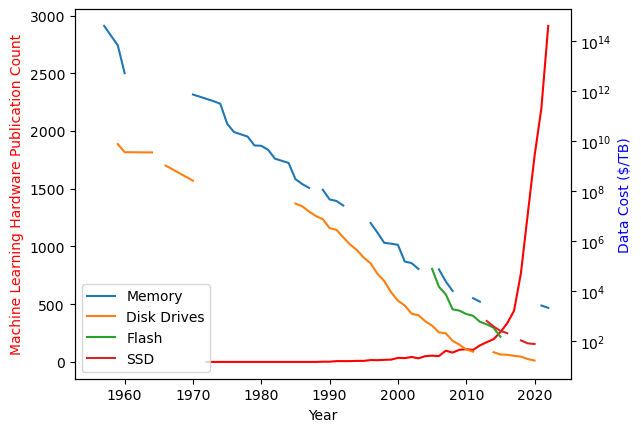

In [217]:
fig, ax1 = plt.subplots()
ax1.plot(years,yr_counts,color='r')
ax1.set_ylabel('Machine Learning Hardware Publication Count',color='r')
ax2 = ax1.twinx()
ax2.set_yscale("log")
# ax2.scatter(years,compute['Training_compute_FLOP'],color='b')
ax2.set_ylabel('Data Cost ($/TB)',color='b')
# ax2.scatter(compute['Publication_date'], compute['Training_compute_FLOP'], s=1)
ax2.set_yscale("log")
ax2.plot(data_cost.index,data_cost['memory'],label='Memory')
ax2.plot(data_cost.index,data_cost['disk_drives'],label='Disk Drives')
ax2.plot(data_cost.index,data_cost['flash'],label='Flash')
ax2.plot(data_cost.index,data_cost['ssd'], label='SSD')
ax1.set_xlabel('Year')
ax2.legend(loc='lower left')
plt.show()

In [7]:
edges = pd.read_csv('../../../data/updated_wos/wos.cites.csv')
# edges = edges.drop('Unnamed: 0', axis=1)
display(edges)
# DOI is node, class is classification, and cited references show edges

,cited_paper_id,citing_paper_id
0,10.1109/CCGrid.2015.114,10.1145/2541940.2541967
1,10.1109/CCGrid.2015.114,10.1109/FCCM.2010.38
2,10.1109/DAC56929.2023.10247935,10.1145/3289602.3293915
3,10.1109/DAC56929.2023.10247935,10.1109/ISCA.2016.13
4,10.1109/DAC56929.2023.10247935,10.1109/ISCA.2016.12
...,...,...
53287,10.1016/j.neunet.2017.04.010,10.1016/j.neucom.2005.11.023
53288,10.1016/j.neunet.2017.04.010,10.1162/NECO_a_00450
53289,10.1016/j.neunet.2017.04.010,10.1016/j.neunet.2013.02.003
53290,10.1016/j.neunet.2017.04.010,10.1016/j.neucom.2013.06.052


In [8]:
data = samples[['paper_id','category']].copy()
data = data.drop_duplicates('paper_id')
data = data.reset_index()
display(data)

,index,paper_id,category
0,0,10.1109/AICAS54282.2022.9869942,MLAccelerator
1,1,10.1109/FCCM51124.2021.00037,MLAccelerator
2,2,10.1109/CCGrid.2015.114,MLAccelerator
3,3,10.1109/ICECCS54210.2022.00031,MLAccelerator
4,6,10.1007/978-3-031-16815-4_12,MLAccelerator
...,...,...,...
11388,13816,10.1063/1.4795280,SpikingNN
11389,13817,10.3389/finsc.2022.818449,SpikingNN
11390,13818,10.1109/ITIME.2009.5236247,SpikingNN
11391,13819,10.1016/j.neunet.2017.04.010,SpikingNN


In [29]:
wos_cites = pd.read_csv('../../../data/updated_wos/wos.cites.csv',names=['target','source'])
# wos_cites.drop(0)
# display(wos_cites)
# wos_cites = edges

wos_content = pd.read_csv('../../../data/updated_wos/wos.content.csv')
wos_content = wos_content[wos_content['paper_id'].notna()]
# wos_content
# display(wos_content)

column_names = ["paper_id"] + ["class_label"] + [word for word in wos_content['word_cited_id'].unique()] # create a word column for each feature
wos_paper = pd.read_csv('../../../data/updated_wos/wos.paper.csv',names=column_names)
wos_paper = wos_paper.drop_duplicates('paper_id')
wos_paper = wos_paper.reset_index()
# wos_paper = data.drop('index',axis=1)
# wos_paper = wos_paper.drop(0)
# display(wos_paper)

wos_cites = wos_cites.drop(0)
display(wos_cites)
wos_paper = wos_paper.drop(0)
wos_paper = wos_paper.drop('level_0',axis=1)
# wos_paper.loc[wos_paper['Class'] == 'N', 'Class'] = 'Neuromorphic'
# wos_paper = wos_paper.drop('index',axis=1)
display(wos_paper)

,target,source
1,10.1109/CCGrid.2015.114,10.1145/2541940.2541967
2,10.1109/CCGrid.2015.114,10.1109/FCCM.2010.38
3,10.1109/DAC56929.2023.10247935,10.1145/3289602.3293915
4,10.1109/DAC56929.2023.10247935,10.1109/ISCA.2016.13
5,10.1109/DAC56929.2023.10247935,10.1109/ISCA.2016.12
...,...,...
53288,10.1016/j.neunet.2017.04.010,10.1016/j.neucom.2005.11.023
53289,10.1016/j.neunet.2017.04.010,10.1162/NECO_a_00450
53290,10.1016/j.neunet.2017.04.010,10.1016/j.neunet.2013.02.003
53291,10.1016/j.neunet.2017.04.010,10.1016/j.neucom.2013.06.052


,paper_id,class_label,learning,physical,performance,accelerator,potential,communication,systems,computational,...,educators,psychologists,way,collation,viewpoint,anatomy,compartments,circadian,regulates,purposely
1,10.1109/AICAS54282.2022.9869942,MLAccelerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.1109/FCCM51124.2021.00037,MLAccelerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.1109/CCGrid.2015.114,MLAccelerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.1109/ICECCS54210.2022.00031,MLAccelerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10.1109/DAC56929.2023.10247935,MLAccelerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13817,10.1063/1.4795280,SpikingNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13818,10.3389/finsc.2022.818449,SpikingNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13819,10.1109/ITIME.2009.5236247,SpikingNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13820,10.1016/j.neunet.2017.04.010,SpikingNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
wos_content = wos_content[wos_content['paper_id'].isin(data['paper_id'])]
display(wos_content)

,paper_id,word_cited_id
0,10.1109/AICAS54282.2022.9869942,learning
1,10.1109/AICAS54282.2022.9869942,physical
2,10.1109/AICAS54282.2022.9869942,performance
3,10.1109/AICAS54282.2022.9869942,accelerator
4,10.1109/AICAS54282.2022.9869942,potential
...,...,...
135804,10.1016/j.biosystems.2013.03.018,events
135805,10.1016/j.biosystems.2013.03.018,lower
135806,10.1016/j.biosystems.2013.03.018,modules
135807,10.1016/j.biosystems.2013.03.018,learning


In [31]:
wos_paper = wos_paper[wos_paper['paper_id'].isin(data['paper_id'])]
display(wos_paper)

,paper_id,class_label,learning,physical,performance,accelerator,potential,communication,systems,computational,...,educators,psychologists,way,collation,viewpoint,anatomy,compartments,circadian,regulates,purposely
1,10.1109/AICAS54282.2022.9869942,MLAccelerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.1109/FCCM51124.2021.00037,MLAccelerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.1109/CCGrid.2015.114,MLAccelerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.1109/ICECCS54210.2022.00031,MLAccelerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10.1007/978-3-031-16815-4_12,MLAccelerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13817,10.1063/1.4795280,SpikingNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13818,10.3389/finsc.2022.818449,SpikingNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13819,10.1109/ITIME.2009.5236247,SpikingNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13820,10.1016/j.neunet.2017.04.010,SpikingNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
print(len(wos_content['word_cited_id'].unique()))

6294


In [33]:
# Initialize each word vector to 0
wos_paper = wos_paper.set_index('paper_id')
for word in wos_content['word_cited_id'].unique():
    wos_paper[word] = 0


In [34]:
# declare the true values for each word vector
for index, row in wos_content.iterrows(): # mark as true for words used by each paper
    wos_paper.at[str(row['paper_id']), str(row['word_cited_id'])] = 1


In [35]:
display(wos_paper)

,class_label,learning,physical,performance,accelerator,potential,communication,systems,computational,practical,...,educators,psychologists,way,collation,viewpoint,anatomy,compartments,circadian,regulates,purposely
paper_id,,,,,,,,,,,,,,,,,,,,,
10.1109/AICAS54282.2022.9869942,MLAccelerator,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10.1109/FCCM51124.2021.00037,MLAccelerator,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/CCGrid.2015.114,MLAccelerator,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/ICECCS54210.2022.00031,MLAccelerator,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1007/978-3-031-16815-4_12,MLAccelerator,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1063/1.4795280,SpikingNN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10.3389/finsc.2022.818449,SpikingNN,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/ITIME.2009.5236247,SpikingNN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# wos_paper = wos_paper.dropna() # remove null values
display(wos_paper)

,class_label,learning,physical,performance,accelerator,potential,communication,systems,computational,practical,...,educators,psychologists,way,collation,viewpoint,anatomy,compartments,circadian,regulates,purposely
paper_id,,,,,,,,,,,,,,,,,,,,,


In [36]:
wos_paper = wos_paper.reset_index()
print(wos_paper.shape)
display(wos_paper)

(11393, 6823)


,paper_id,class_label,learning,physical,performance,accelerator,potential,communication,systems,computational,...,educators,psychologists,way,collation,viewpoint,anatomy,compartments,circadian,regulates,purposely
0,10.1109/AICAS54282.2022.9869942,MLAccelerator,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10.1109/FCCM51124.2021.00037,MLAccelerator,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.1109/CCGrid.2015.114,MLAccelerator,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.1109/ICECCS54210.2022.00031,MLAccelerator,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.1007/978-3-031-16815-4_12,MLAccelerator,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11388,10.1063/1.4795280,SpikingNN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11389,10.3389/finsc.2022.818449,SpikingNN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11390,10.1109/ITIME.2009.5236247,SpikingNN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11391,10.1016/j.neunet.2017.04.010,SpikingNN,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
wos_paper = wos_paper.fillna(0)
display(wos_paper[wos_paper.isna().any(axis=1)])

,paper_id,class_label,learning,physical,performance,accelerator,potential,communication,systems,computational,...,educators,psychologists,way,collation,viewpoint,anatomy,compartments,circadian,regulates,purposely


In [78]:
wos_cites = wos_cites[wos_cites['source'].isin(wos_paper['paper_id'])] # remove edges that are not in wos_paper
wos_cites = wos_cites[wos_cites['target'].isin(wos_paper['paper_id'])]

In [79]:
display(wos_cites)

,target,source
1,2,6
2,2,704
8,5,1057
9,5,6
10,5,482
...,...,...
53288,11391,8697
53289,11391,11008
53290,11391,8398
53291,11391,8967


In [80]:
class_values = sorted(wos_paper["class_label"].unique()) # one hot encoding of rest of variables
class_idx = {name: id for id, name in enumerate(class_values)}
paper_idx = {name: idx for idx, name in enumerate((wos_paper["paper_id"].unique()))}

wos_cites["source"] = wos_cites["source"].apply(lambda name: paper_idx[name])
wos_cites["target"] = wos_cites["target"].apply(lambda name: paper_idx[name])
wos_paper["paper_id"] = wos_paper["paper_id"].apply(lambda name: paper_idx[name])
wos_paper["class_label"] = wos_paper["class_label"].apply(lambda value: class_idx[value])

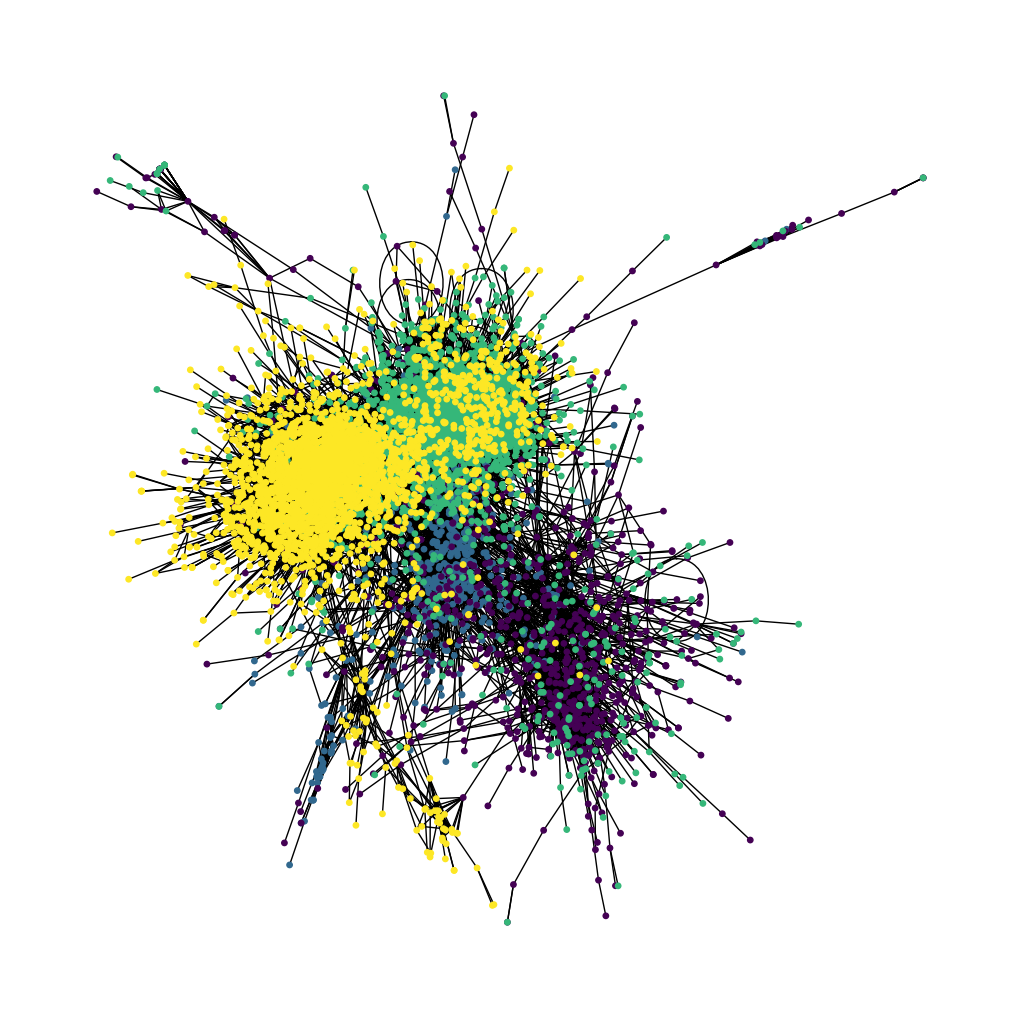

In [81]:
plt.figure(figsize=(10, 10))
colors = wos_paper["class_label"].tolist()
wos_graph = nx.from_pandas_edgelist(wos_cites)#.sample(n=1500))
wos_graph = wos_graph.subgraph(sorted(nx.connected_components(wos_graph), key=len, reverse=True)[0])
subjects = list(wos_paper[wos_paper["paper_id"].isin(list(wos_graph.nodes))]["class_label"])
nx.draw_spring(wos_graph, node_size=15, node_color=subjects)

In [82]:
wos_df = nx.to_pandas_edgelist(wos_graph)
display(wos_df)

,source,target
0,6,2
1,6,5
2,6,11248
3,6,10508
4,6,12
...,...,...
39206,11168,11355
39207,11181,11198
39208,11300,11329
39209,9305,11315


In [45]:
# display(new_samples1, new_samples2)

,paper_id,category,year,keywords,cited_by


,paper_id,category,year,keywords,cited_by


In [44]:
# new_samples1 = samples[samples['paper_id'].isin(wos_df['source'])]
# new_samples2 = samples[samples['paper_id'].isin(wos_df['target'])]
# new_samples = pd.concat([new_samples1, new_samples2])
# new_samples = new_samples.drop_duplicates()
# display(new_samples)

,paper_id,category,year,keywords,cited_by


In [40]:
# new_samples.to_csv('../../data/updated_wos/wos.complete.connected.csv')

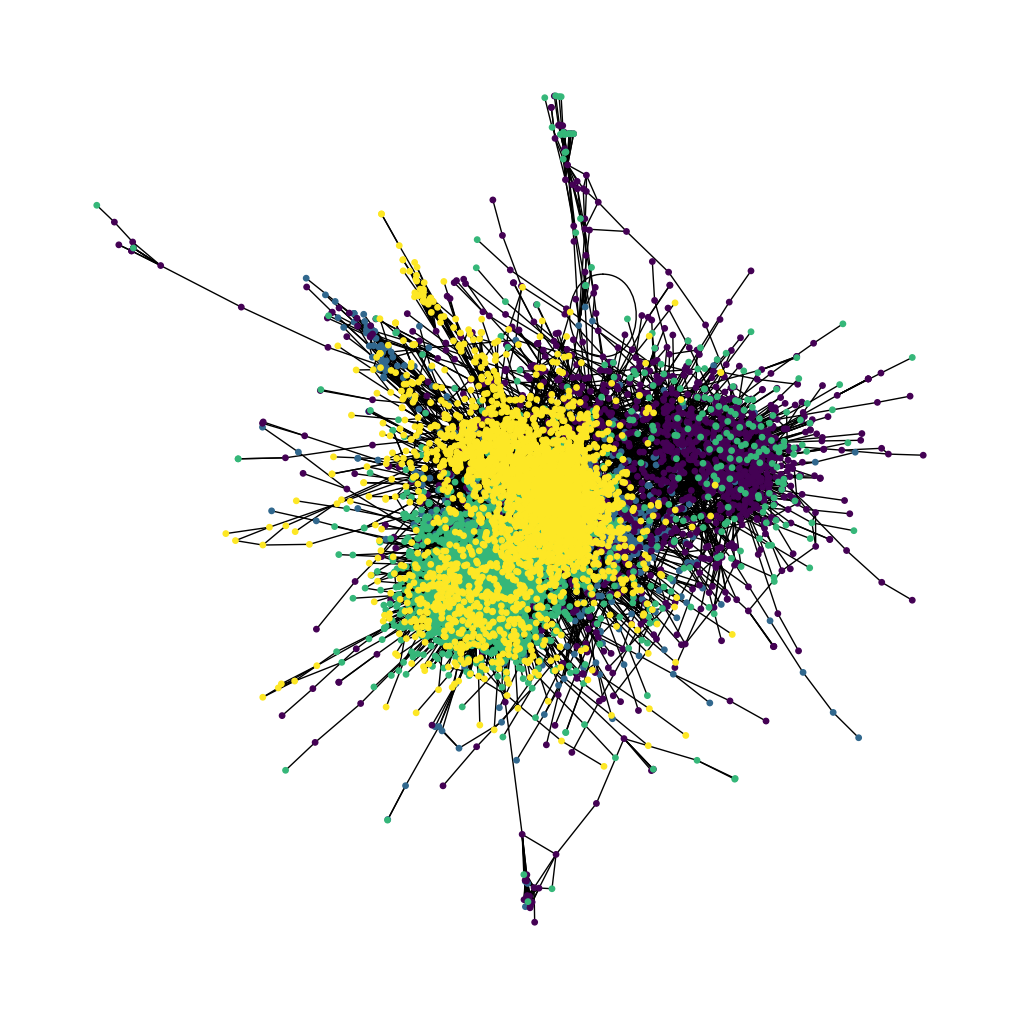

In [18]:
# plt.figure(figsize=(10, 10))
# colors = wos_paper["class_label"].tolist()
# wos_graph = nx.from_pandas_edgelist(wos_cites)#.sample(n=1500))
# wos_graph = wos_graph.subgraph(sorted(nx.connected_components(wos_graph), key=len, reverse=True)[0])
# subjects = list(wos_paper[wos_paper["paper_id"].isin(list(wos_graph.nodes))]["class_label"])
# nx.draw_spring(wos_graph, node_size=15, node_color=subjects)

## Graph Characteristics

In [83]:
# finding characteristics of Graph
print(nx.average_clustering(wos_graph))
# print(nx.average_shortest_path_length(wos_graph))
print(min([nx.diameter(wos_graph.subgraph(g).copy()) for g in nx.connected_components(wos_graph)]))
print(nx.average_degree_connectivity(wos_graph))
print(np.average([j for i,j in wos_graph.degree()]))

0.16513001754821174
15
{124: 13.96774193548387, 11: 60.75115207373272, 2: 56.66095132743363, 12: 59.916666666666664, 8: 65.47576923076923, 120: 32.291666666666664, 35: 51.8043956043956, 31: 46.95322580645161, 47: 45.91489361702128, 6: 61.536098310291855, 1: 54.62089810017271, 3: 61.089356110381075, 74: 35.78716216216216, 4: 63.630551301684534, 18: 57.18162393162393, 10: 63.74186046511628, 23: 49.56521739130435, 27: 52.074074074074076, 20: 57.422222222222224, 15: 58.96417910447761, 24: 60.50126262626262, 77: 36.61038961038961, 22: 52.46569468267582, 155: 17.3, 16: 61.45338983050848, 7: 65.31351351351351, 55: 50.192727272727275, 19: 54.680033416875524, 9: 65.73060428849902, 186: 30.956989247311828, 14: 56.792748917748916, 121: 42.47933884297521, 123: 20.5609756097561, 81: 49.75925925925926, 21: 51.83774250440917, 29: 53.65398335315101, 104: 25.317307692307693, 36: 47.495098039215684, 5: 62.333333333333336, 32: 51.192934782608695, 118: 20.110169491525422, 45: 44.544444444444444, 13: 61.07

In [84]:
print(len(wos_graph.nodes))
print(len(wos_graph.edges))

7673
39211


## Node Classification

base neural net

In [85]:
train_data, test_data = [], []

for _, group_data in wos_paper.groupby("class_label"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.8
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (9129, 6823)
Test data shape: (2264, 6823)


In [86]:
hidden_units = [32, 32]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 100
batch_size = 256

In [87]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="lower right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)



In [89]:
feature_names = set(wos_paper.columns) - {"paper_id", "class_label"}
num_features = len(feature_names)
num_classes = len(class_idx)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()
x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["class_label"]
y_test = test_data["class_label"]

In [91]:
def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    logits = layers.Dense(num_classes, name="logits")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features (InputLayer)    [(None, 6821)]       0           []                               
                                                                                                  
 ffn_block1 (Sequential)        (None, 32)           246772      ['input_features[0][0]']         
                                                                                                  
 ffn_block2 (Sequential)        (None, 32)           2368        ['ffn_block1[0][0]']             
                                                                                                  
 skip_connection2 (Add)         (None, 32)           0           ['ffn_block1[0][0]',             
                                                                  'ffn_block2[0][0]']      

In [92]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/100
31/31 [==============================] - 5s 50ms/step - loss: 1.7067 - acc: 0.3290 - val_loss: 1.4678 - val_acc: 0.3387
Epoch 2/100
31/31 [==============================] - 1s 31ms/step - loss: 1.2458 - acc: 0.4632 - val_loss: 1.7290 - val_acc: 0.2745
Epoch 3/100
31/31 [==============================] - 1s 32ms/step - loss: 1.0597 - acc: 0.5627 - val_loss: 1.1996 - val_acc: 0.4650
Epoch 4/100
31/31 [==============================] - 1s 32ms/step - loss: 0.9249 - acc: 0.6363 - val_loss: 1.1286 - val_acc: 0.5080
Epoch 5/100
31/31 [==============================] - 1s 32ms/step - loss: 0.8283 - acc: 0.6744 - val_loss: 1.1022 - val_acc: 0.5182
Epoch 6/100
31/31 [==============================] - 1s 32ms/step - loss: 0.7677 - acc: 0.7005 - val_loss: 0.9667 - val_acc: 0.5737
Epoch 7/100
31/31 [==============================] - 1s 33ms/step - loss: 0.7196 - acc: 0.7266 - val_loss: 0.8564 - val_acc: 0.6774
Epoch 8/100
31/31 [==============================] - 1s 33ms/step - loss: 0.

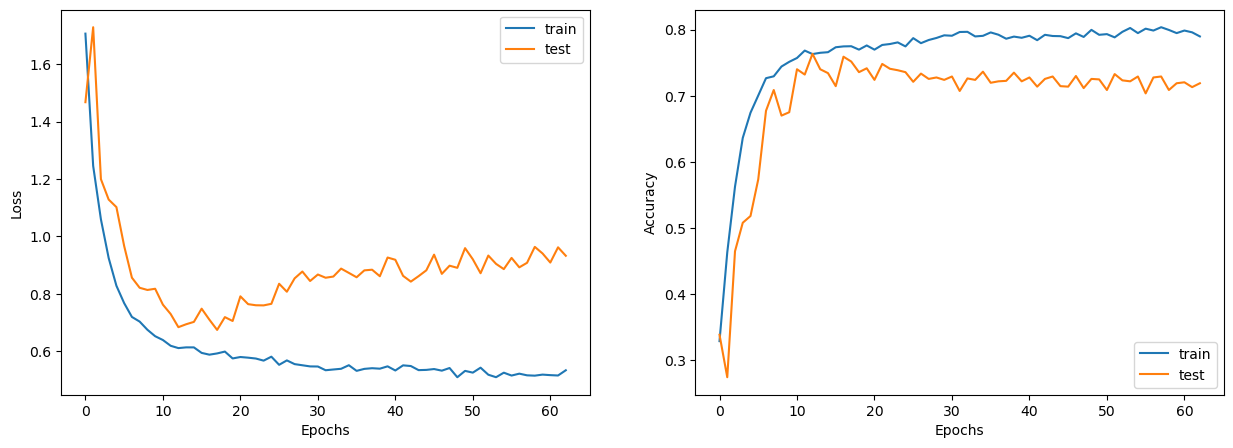

Test accuracy: 78.31%


In [93]:
display_learning_curves(history)
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

In [94]:
def generate_random_instances(num_instances):
    token_probability = x_train.mean(axis=0)
    instances = []
    for _ in range(num_instances):
        probabilities = np.random.uniform(size=len(token_probability))
        instance = (probabilities <= token_probability).astype(int)
        instances.append(instance)

    return np.array(instances)


def display_class_probabilities(probabilities):
    for instance_idx, probs in enumerate(probabilities):
        print(f"Instance {instance_idx + 1}:")
        for class_idx, prob in enumerate(probs):
            print(f"- {class_values[class_idx]}: {round(prob * 100, 2)}%")


In [95]:
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

1/1 [==============================] - 0s 333ms/step
Instance 1:
- 0: 47.04%
- 1: 10.46%
- 2: 15.13%
- 3: 27.37%
Instance 2:
- 0: 50.86%
- 1: 18.68%
- 2: 10.79%
- 3: 19.67%
Instance 3:
- 0: 38.48%
- 1: 11.42%
- 2: 5.11%
- 3: 44.99%
Instance 4:
- 0: 28.34%
- 1: 12.82%
- 2: 7.21%
- 3: 51.62%


GNN

In [96]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = wos_cites[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    wos_paper.sort_values("paper_id")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)


Edges shape: (2, 39581)
Nodes shape: (11393, 6821)


In [97]:
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim]
        num_nodes = node_repesentations.shape[0]
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
            node_indices, neighbour_messages, node_repesentations
        )
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)


In [98]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)


In [99]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[ 0.0774525   0.04379852 -0.05665983 -0.05654809]
 [-0.11663236 -0.03087033 -0.0204977  -0.01352428]
 [ 0.00296185 -0.05119682 -0.05839889 -0.0628129 ]], shape=(3, 4), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (11393, 32)               246772    
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 postprocess (Sequential)    (11393, 32)               2368      
                                          

In [100]:
x_train = train_data.paper_id.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)


Epoch 1/100
31/31 [==============================] - 46s 1s/step - loss: 1.4343 - acc: 0.3075 - val_loss: 1.3520 - val_acc: 0.3051
Epoch 2/100
31/31 [==============================] - 44s 1s/step - loss: 1.3263 - acc: 0.3252 - val_loss: 1.3302 - val_acc: 0.3022
Epoch 3/100
31/31 [==============================] - 45s 1s/step - loss: 1.2981 - acc: 0.3763 - val_loss: 1.3438 - val_acc: 0.3051
Epoch 4/100
31/31 [==============================] - 47s 2s/step - loss: 1.1969 - acc: 0.4749 - val_loss: 1.3874 - val_acc: 0.3146
Epoch 5/100
31/31 [==============================] - 45s 1s/step - loss: 1.0711 - acc: 0.5661 - val_loss: 1.3661 - val_acc: 0.4723
Epoch 6/100
31/31 [==============================] - 45s 1s/step - loss: 0.9542 - acc: 0.6313 - val_loss: 1.3333 - val_acc: 0.4277
Epoch 7/100
31/31 [==============================] - 45s 1s/step - loss: 0.8857 - acc: 0.6663 - val_loss: 1.6245 - val_acc: 0.3934
Epoch 8/100
31/31 [==============================] - 47s 2s/step - loss: 0.8425 - a

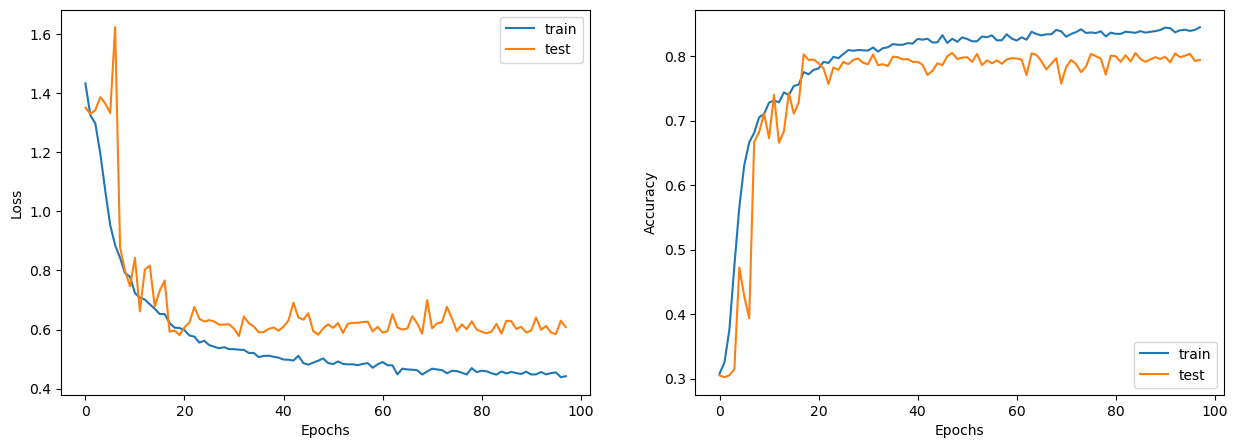

Test accuracy: 82.38%


In [101]:
display_learning_curves(history)
x_test = test_data.paper_id.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

## Link Prediction

In [102]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import FullBatchLinkGenerator
from stellargraph.layer import GCN, LinkEmbedding
from stellargraph import StellarGraph


from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
%matplotlib inline

In [103]:
node_features = wos_paper[wos_paper['paper_id'].isin(wos_graph.nodes)]
wos = StellarGraph.from_networkx(wos_graph,node_features=node_features.set_index('paper_id').drop('class_label',axis=1))
print(wos.info())

StellarGraph: Undirected multigraph
 Nodes: 7673, Edges: 39211

 Node types:
  default: [7673]
    Features: float32 vector, length 6821
    Edge types: default-default->default

 Edge types:
    default-default->default: [39211]
        Weights: all 1 (default)
        Features: none


In [104]:
# Define an edge splitter on the original graph G:
edge_splitter_test = EdgeSplitter(wos)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G, and obtain the
# reduced graph G_test with the sampled links removed:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 3921 positive and 3921 negative edges. **


In [105]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=0.1, method="global", keep_connected=True
)



** Sampled 3529 positive and 3529 negative edges. **


In [106]:
epochs = 40

In [107]:
train_gen = FullBatchLinkGenerator(G_train, method="gcn")
train_flow = train_gen.flow(edge_ids_train, edge_labels_train)

Using GCN (local pooling) filters...


In [108]:
test_gen = FullBatchLinkGenerator(G_test, method="gcn")
test_flow = train_gen.flow(edge_ids_test, edge_labels_test)

Using GCN (local pooling) filters...


In [109]:
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=train_gen, dropout=0.3
)

In [110]:
x_inp, x_out = gcn.in_out_tensors()

In [111]:
prediction = LinkEmbedding(activation="relu", method="ip")(x_out)

In [112]:
prediction = keras.layers.Reshape((-1,))(prediction)

In [113]:
model = keras.Model(inputs=x_inp, outputs=prediction)

history = model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01),
    loss=keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

c:\Users\reece\miniconda3\envs\tensorflow_cpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [114]:
init_train_metrics = model.evaluate(train_flow)
init_test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 285ms/step - loss: 3.6953 - binary_accuracy: 0.5000

Train Set Metrics of the initial (untrained) model:
	loss: 3.6954
	binary_accuracy: 0.5000

Test Set Metrics of the initial (untrained) model:
	loss: 3.6953
	binary_accuracy: 0.5000


In [115]:
history = model.fit(
    train_flow, epochs=epochs, validation_data=test_flow, verbose=2, shuffle=False
)

Epoch 1/40
1/1 - 2s - loss: 3.6193 - binary_accuracy: 0.5000 - val_loss: 0.9167 - val_binary_accuracy: 0.5272 - 2s/epoch - 2s/step
Epoch 2/40
1/1 - 1s - loss: 0.9296 - binary_accuracy: 0.5252 - val_loss: 0.5513 - val_binary_accuracy: 0.7595 - 765ms/epoch - 765ms/step
Epoch 3/40
1/1 - 1s - loss: 0.5494 - binary_accuracy: 0.7513 - val_loss: 1.2380 - val_binary_accuracy: 0.6540 - 776ms/epoch - 776ms/step
Epoch 4/40
1/1 - 1s - loss: 1.2832 - binary_accuracy: 0.6700 - val_loss: 2.1049 - val_binary_accuracy: 0.5699 - 793ms/epoch - 793ms/step
Epoch 5/40
1/1 - 1s - loss: 2.1072 - binary_accuracy: 0.5968 - val_loss: 2.0571 - val_binary_accuracy: 0.5723 - 770ms/epoch - 770ms/step
Epoch 6/40
1/1 - 1s - loss: 2.1559 - binary_accuracy: 0.5883 - val_loss: 1.6076 - val_binary_accuracy: 0.6132 - 779ms/epoch - 779ms/step
Epoch 7/40
1/1 - 1s - loss: 1.7021 - binary_accuracy: 0.6221 - val_loss: 0.9499 - val_binary_accuracy: 0.7196 - 790ms/epoch - 790ms/step
Epoch 8/40
1/1 - 1s - loss: 1.0063 - binary_acc

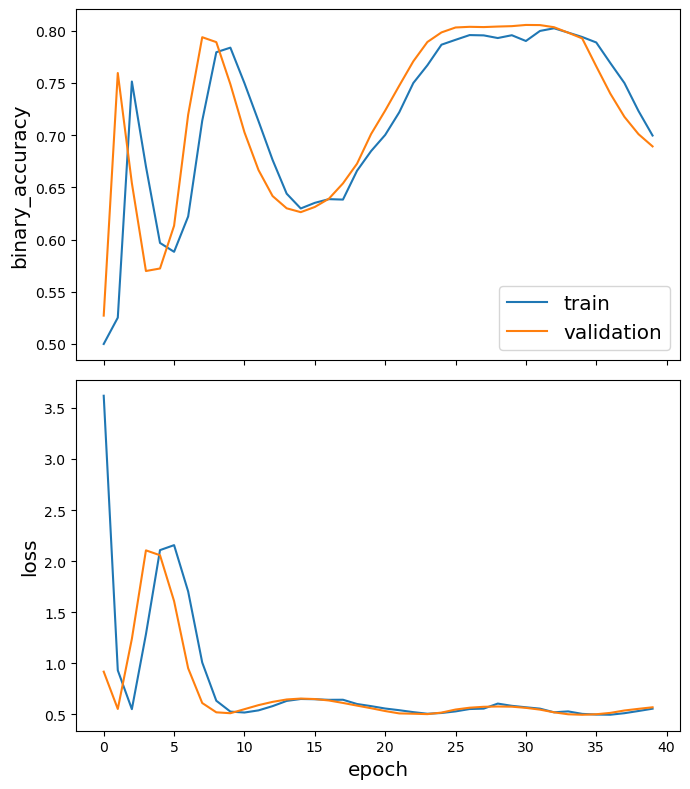

In [116]:
sg.utils.plot_history(history)

In [117]:
train_metrics = model.evaluate(train_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 273ms/step - loss: 0.5678 - binary_accuracy: 0.6892

Train Set Metrics of the trained model:
	loss: 0.5559
	binary_accuracy: 0.6899

Test Set Metrics of the trained model:
	loss: 0.5678
	binary_accuracy: 0.6892


## PCA

In [118]:
# Import necessary libraries
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [119]:
features = wos_paper.drop(['paper_id','class_label'], axis=1)

In [120]:
pca = PCA(n_components=0.8)
pca.fit(features)
data_pca = pd.DataFrame(pca.transform(features))
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,-0.197995,0.809295,0.272354,-0.226415,0.307052,-0.880620,0.776614,0.391716,0.394453,0.009671,...,0.000760,0.002992,-0.003404,-0.000990,0.002086,-0.002511,-0.001055,0.012119,0.005734,-0.007974
1,-0.210246,1.041470,-0.374929,0.000799,-0.175018,0.059253,-0.178556,-0.417228,0.102748,0.098460,...,-0.014241,0.045236,0.001779,0.053655,-0.018289,-0.038227,0.001575,-0.013860,0.013318,-0.014118
2,-0.133519,1.113711,-0.413099,0.007977,-0.246242,-0.036213,-0.113232,-0.284754,0.096778,0.068816,...,-0.039587,0.001729,0.061557,0.048584,-0.046241,-0.071467,0.013630,-0.030117,0.059034,-0.000037
3,-0.389784,0.778986,0.214772,-0.320973,0.071430,-0.118814,-0.192798,0.034004,0.003371,-0.025570,...,-0.007603,0.024663,0.000905,0.021125,-0.042621,-0.030109,-0.004465,-0.002868,-0.010489,-0.017340
4,0.193255,0.338011,-0.941368,0.684803,0.702042,0.167466,-0.151206,-0.154193,-0.325364,1.111623,...,-0.000487,-0.062473,-0.031447,-0.017861,0.003201,0.008725,-0.022747,0.015627,-0.002930,0.083423


In [121]:
reduced_wos_papers = wos_paper[['paper_id','class_label']].join(data_pca)
display(reduced_wos_papers)

,paper_id,class_label,0,1,2,3,4,5,6,7,...,740,741,742,743,744,745,746,747,748,749
0,0,1,-0.197995,0.809295,0.272354,-0.226415,0.307052,-0.880620,0.776614,0.391716,...,0.000760,0.002992,-0.003404,-0.000990,0.002086,-0.002511,-0.001055,0.012119,0.005734,-0.007974
1,1,1,-0.210246,1.041470,-0.374929,0.000799,-0.175018,0.059253,-0.178556,-0.417228,...,-0.014241,0.045236,0.001779,0.053655,-0.018289,-0.038227,0.001575,-0.013860,0.013318,-0.014118
2,2,1,-0.133519,1.113711,-0.413099,0.007977,-0.246242,-0.036213,-0.113232,-0.284754,...,-0.039587,0.001729,0.061557,0.048584,-0.046241,-0.071467,0.013630,-0.030117,0.059034,-0.000037
3,3,1,-0.389784,0.778986,0.214772,-0.320973,0.071430,-0.118814,-0.192798,0.034004,...,-0.007603,0.024663,0.000905,0.021125,-0.042621,-0.030109,-0.004465,-0.002868,-0.010489,-0.017340
4,4,1,0.193255,0.338011,-0.941368,0.684803,0.702042,0.167466,-0.151206,-0.154193,...,-0.000487,-0.062473,-0.031447,-0.017861,0.003201,0.008725,-0.022747,0.015627,-0.002930,0.083423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11388,11388,3,-0.158701,-0.254013,-0.139603,-0.278030,-0.158543,-0.029576,-0.166406,-0.030165,...,0.020430,-0.006374,-0.029880,-0.028381,-0.011256,0.021338,0.048197,0.016568,0.035921,0.007321
11389,11389,3,-0.185289,-0.314464,-0.057374,-0.213376,0.142466,-0.667376,0.552917,-0.401876,...,-0.036249,-0.069800,-0.136953,-0.022685,0.027143,0.013167,0.138249,-0.008554,-0.091134,-0.046021
11390,11390,3,-0.236986,-0.239873,-0.089444,-0.277144,-0.106074,0.018716,-0.117263,-0.018454,...,-0.021471,-0.019541,-0.015445,0.057867,0.020508,-0.047629,0.029740,-0.033103,0.006263,-0.006890
11391,11391,3,-0.600712,0.652963,0.406139,-0.065304,0.030601,-0.053125,0.158500,0.533904,...,-0.039797,-0.017763,0.020128,0.052467,-0.016325,0.050674,-0.044346,-0.016091,0.020826,0.055922


Base NN

In [122]:
train_data, test_data = [], []

for _, group_data in reduced_wos_papers.groupby("class_label"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.8
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (9113, 752)
Test data shape: (2280, 752)


In [123]:
feature_names = set(reduced_wos_papers.columns) - {"paper_id", "class_label"}
num_features = len(feature_names)
num_classes = len(class_idx)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()
x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["class_label"]
y_test = test_data["class_label"]

In [124]:
def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    logits = layers.Dense(num_classes, name="logits")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features (InputLayer)    [(None, 750)]        0           []                               
                                                                                                  
 ffn_block1 (Sequential)        (None, 32)           28216       ['input_features[0][0]']         
                                                                                                  
 ffn_block2 (Sequential)        (None, 32)           2368        ['ffn_block1[0][0]']             
                                                                                                  
 skip_connection2 (Add)         (None, 32)           0           ['ffn_block1[0][0]',             
                                                                  'ffn_block2[0][0]']      

In [125]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/100
31/31 [==============================] - 4s 28ms/step - loss: 1.9224 - acc: 0.2962 - val_loss: 1.3699 - val_acc: 0.2919
Epoch 2/100
31/31 [==============================] - 0s 14ms/step - loss: 1.4155 - acc: 0.3207 - val_loss: 1.3347 - val_acc: 0.2919
Epoch 3/100
31/31 [==============================] - 0s 16ms/step - loss: 1.3284 - acc: 0.3491 - val_loss: 1.2807 - val_acc: 0.3584
Epoch 4/100
31/31 [==============================] - 0s 15ms/step - loss: 1.2656 - acc: 0.4116 - val_loss: 1.1952 - val_acc: 0.5633
Epoch 5/100
31/31 [==============================] - 0s 15ms/step - loss: 1.1915 - acc: 0.4689 - val_loss: 1.0812 - val_acc: 0.5486
Epoch 6/100
31/31 [==============================] - 0s 15ms/step - loss: 1.1378 - acc: 0.5001 - val_loss: 0.9783 - val_acc: 0.6437
Epoch 7/100
31/31 [==============================] - 0s 15ms/step - loss: 1.0824 - acc: 0.5418 - val_loss: 0.9166 - val_acc: 0.6730
Epoch 8/100
31/31 [==============================] - 0s 15ms/step - loss: 1.

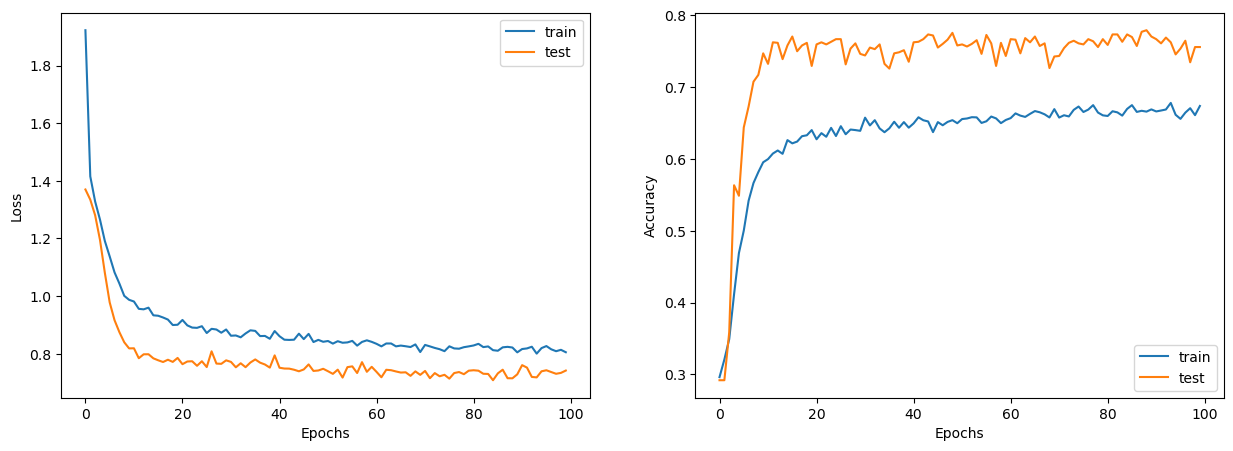

Test accuracy: 75.26%


In [126]:
display_learning_curves(history)
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

In [127]:
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

1/1 [==============================] - 0s 360ms/step
Instance 1:
- 0: 20.76%
- 1: 5.32%
- 2: 41.22%
- 3: 32.71%
Instance 2:
- 0: 20.76%
- 1: 5.32%
- 2: 41.22%
- 3: 32.71%
Instance 3:
- 0: 20.76%
- 1: 5.32%
- 2: 41.22%
- 3: 32.71%
Instance 4:
- 0: 20.76%
- 1: 5.32%
- 2: 41.22%
- 3: 32.71%


GNN Node Classification

In [128]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = wos_cites[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    reduced_wos_papers.sort_values("paper_id")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (2, 39581)
Nodes shape: (11393, 750)


In [129]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[-0.17168444 -0.0289801   0.02372539  0.08073393]
 [ 0.1633265  -0.04691061 -0.09461065 -0.0519401 ]
 [-0.14054233 -0.07992701  0.00586411  0.02436951]], shape=(3, 4), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (11393, 32)               28216     
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 postprocess (Sequential)    (11393, 32)               2368      
                                          

In [130]:
x_train = train_data.paper_id.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)

Epoch 1/100
31/31 [==============================] - 15s 366ms/step - loss: 1.4313 - acc: 0.2965 - val_loss: 1.3520 - val_acc: 0.3160
Epoch 2/100
31/31 [==============================] - 12s 403ms/step - loss: 1.3432 - acc: 0.3031 - val_loss: 1.3259 - val_acc: 0.3160
Epoch 3/100
31/31 [==============================] - 12s 401ms/step - loss: 1.3255 - acc: 0.3106 - val_loss: 1.3166 - val_acc: 0.3738
Epoch 4/100
31/31 [==============================] - 13s 414ms/step - loss: 1.3074 - acc: 0.3416 - val_loss: 1.2793 - val_acc: 0.3665
Epoch 5/100
31/31 [==============================] - 13s 431ms/step - loss: 1.2677 - acc: 0.3972 - val_loss: 1.1402 - val_acc: 0.5369
Epoch 6/100
31/31 [==============================] - 13s 430ms/step - loss: 1.2205 - acc: 0.4454 - val_loss: 1.0454 - val_acc: 0.5977
Epoch 7/100
31/31 [==============================] - 12s 401ms/step - loss: 1.1728 - acc: 0.4823 - val_loss: 0.9541 - val_acc: 0.6123
Epoch 8/100
31/31 [==============================] - 12s 398ms

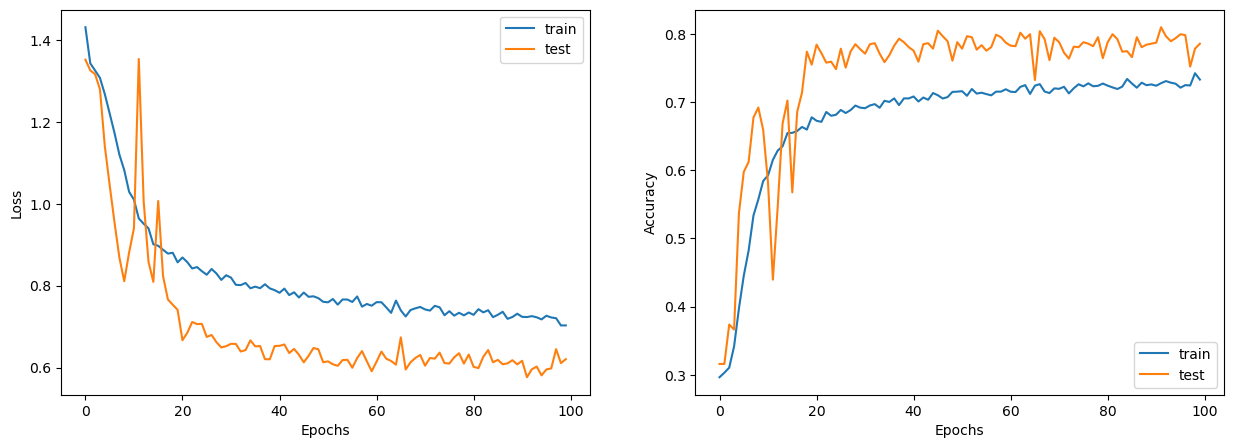

Test accuracy: 79.25%


In [131]:
display_learning_curves(history)
x_test = test_data.paper_id.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Link Prediction

In [132]:
node_features = reduced_wos_papers[reduced_wos_papers['paper_id'].isin(wos_graph.nodes)]
wos = StellarGraph.from_networkx(wos_graph,node_features=node_features.set_index('paper_id').drop('class_label',axis=1))
print(wos.info())

StellarGraph: Undirected multigraph
 Nodes: 7673, Edges: 39211

 Node types:
  default: [7673]
    Features: float32 vector, length 750
    Edge types: default-default->default

 Edge types:
    default-default->default: [39211]
        Weights: all 1 (default)
        Features: none


In [133]:
# Define an edge splitter on the original graph G:
edge_splitter_test = EdgeSplitter(wos)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G, and obtain the
# reduced graph G_test with the sampled links removed:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 3921 positive and 3921 negative edges. **


In [134]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=0.1, method="global", keep_connected=True
)


** Sampled 3529 positive and 3529 negative edges. **


In [135]:
epochs = 40

In [136]:
train_gen = FullBatchLinkGenerator(G_train, method="gcn")
train_flow = train_gen.flow(edge_ids_train, edge_labels_train)

Using GCN (local pooling) filters...


In [137]:
test_gen = FullBatchLinkGenerator(G_test, method="gcn")
test_flow = train_gen.flow(edge_ids_test, edge_labels_test)

Using GCN (local pooling) filters...


In [138]:
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=train_gen, dropout=0.3
)
x_inp, x_out = gcn.in_out_tensors()


In [139]:
prediction = LinkEmbedding(activation="relu", method="ip")(x_out)
prediction = keras.layers.Reshape((-1,))(prediction)
model = keras.Model(inputs=x_inp, outputs=prediction)

In [140]:
history = model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01),
    loss=keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)
init_train_metrics = model.evaluate(train_flow)
init_test_metrics = model.evaluate(test_flow)

c:\Users\reece\miniconda3\envs\tensorflow_cpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 81ms/step - loss: 2.6046 - binary_accuracy: 0.5000


In [141]:
print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))


Train Set Metrics of the initial (untrained) model:
	loss: 2.5904
	binary_accuracy: 0.5000

Test Set Metrics of the initial (untrained) model:
	loss: 2.6046
	binary_accuracy: 0.5000


In [142]:
history = model.fit(
    train_flow, epochs=epochs, validation_data=test_flow, verbose=2, shuffle=False
)

Epoch 1/40
1/1 - 1s - loss: 2.4896 - binary_accuracy: 0.5000 - val_loss: 1.5653 - val_binary_accuracy: 0.5000 - 978ms/epoch - 978ms/step
Epoch 2/40
1/1 - 0s - loss: 1.5030 - binary_accuracy: 0.5001 - val_loss: 1.0557 - val_binary_accuracy: 0.5087 - 184ms/epoch - 184ms/step
Epoch 3/40
1/1 - 0s - loss: 1.0300 - binary_accuracy: 0.5118 - val_loss: 0.7225 - val_binary_accuracy: 0.5866 - 158ms/epoch - 158ms/step
Epoch 4/40
1/1 - 0s - loss: 0.6965 - binary_accuracy: 0.6057 - val_loss: 0.5261 - val_binary_accuracy: 0.7188 - 169ms/epoch - 169ms/step
Epoch 5/40
1/1 - 0s - loss: 0.5298 - binary_accuracy: 0.7322 - val_loss: 0.4875 - val_binary_accuracy: 0.8133 - 187ms/epoch - 187ms/step
Epoch 6/40
1/1 - 0s - loss: 0.5177 - binary_accuracy: 0.8083 - val_loss: 0.6232 - val_binary_accuracy: 0.8134 - 151ms/epoch - 151ms/step
Epoch 7/40
1/1 - 0s - loss: 0.7219 - binary_accuracy: 0.7930 - val_loss: 0.7976 - val_binary_accuracy: 0.7850 - 152ms/epoch - 152ms/step
Epoch 8/40
1/1 - 0s - loss: 0.8916 - bina

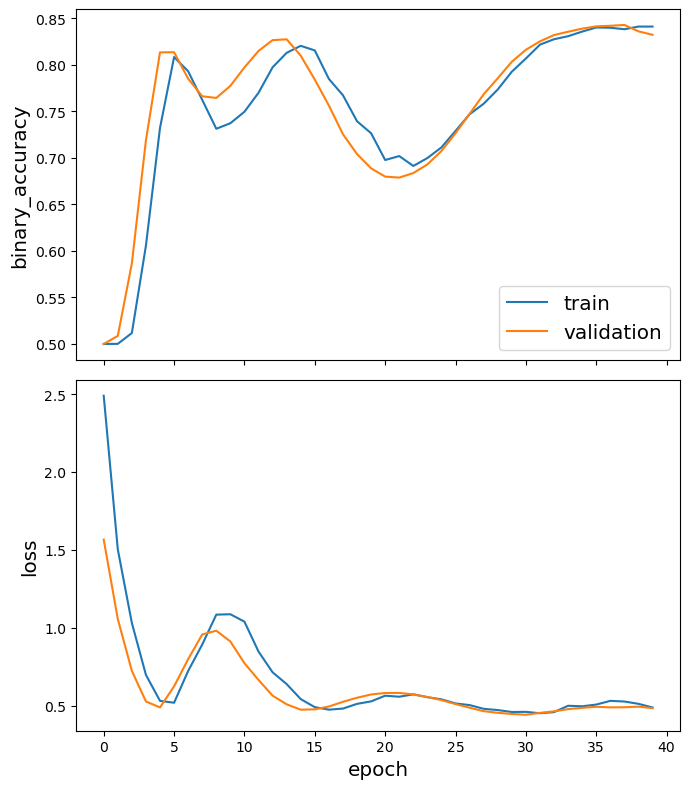

In [143]:
sg.utils.plot_history(history)

In [144]:
train_metrics = model.evaluate(train_flow)
test_metrics = model.evaluate(test_flow)

1/1 [==============================] - 0s 72ms/step - loss: 0.4828 - binary_accuracy: 0.8322


In [145]:
print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))


Train Set Metrics of the trained model:
	loss: 0.4650
	binary_accuracy: 0.8434

Test Set Metrics of the trained model:
	loss: 0.4828
	binary_accuracy: 0.8322


## TSNE

In [146]:
import dgl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from dgl.nn import GraphConv
import torch.nn.functional as F
import numpy as np
from sklearn.manifold import TSNE

c:\Users\reece\miniconda3\envs\tensorflow_cpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [147]:
display(wos_paper)

,paper_id,class_label,learning,physical,performance,accelerator,potential,communication,systems,computational,...,educators,psychologists,way,collation,viewpoint,anatomy,compartments,circadian,regulates,purposely
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11388,11388,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11389,11389,3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11390,11390,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11391,11391,3,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
subset = wos_paper[wos_paper['paper_id'].isin(wos_graph.nodes)]
# node_features = tf.cast(
#     subset.sort_values("paper_id")[feature_names].to_numpy(), dtype=tf.dtypes.float32
# )
node_features = subset.drop(['paper_id','class_label'],axis=1)
node_labels = subset['class_label']
n_features = node_features.shape[0]
# node_labels = wos_paper[wos_paper['DOI'].isin(list(wos_graph.nodes))].sort_values('DOI')['Class']
n_labels = int(node_labels.max() + 1)

In [149]:
# perform TSNE and visualize
tsne = TSNE(n_components=2)
tsne_res = tsne.fit_transform(node_features)

C:\Users\reece\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\reece\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [150]:
display(wos_paper)
print(node_features)
print(node_labels)

,paper_id,class_label,learning,physical,performance,accelerator,potential,communication,systems,computational,...,educators,psychologists,way,collation,viewpoint,anatomy,compartments,circadian,regulates,purposely
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11388,11388,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11389,11389,3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11390,11390,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11391,11391,3,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


       learning  physical  performance  accelerator  potential  communication  \
1             1         0            0            0          0              0   
2             1         0            0            1          0              0   
5             0         0            0            1          0              0   
6             1         0            0            0          0              0   
8             1         0            0            1          0              0   
...         ...       ...          ...          ...        ...            ...   
11386         0         0            0            0          0              0   
11388         0         0            0            0          0              0   
11389         0         0            0            0          0              0   
11391         1         0            1            0          0              0   
11392         1         0            0            0          0              0   

       systems  computation

T-SNE of WoS before PCA

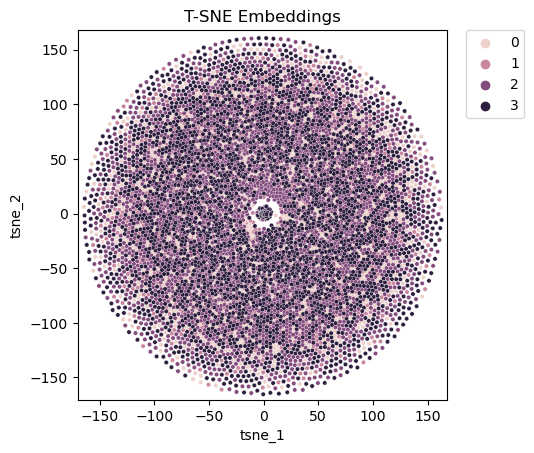

In [151]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_res[:,0], 'tsne_2': tsne_res[:,1], 'label': node_labels})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_res.min()-5, tsne_res.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_title('T-SNE Embeddings')
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [152]:
subset = reduced_wos_papers[reduced_wos_papers['paper_id'].isin(wos_graph.nodes)]
# node_features = tf.cast(
#     subset.sort_values("paper_id")[feature_names].to_numpy(), dtype=tf.dtypes.float32
# )
node_features = subset.drop(['paper_id','class_label'],axis=1)
node_labels = subset['class_label']
n_features = node_features.shape[0]
# node_labels = wos_paper[wos_paper['DOI'].isin(list(wos_graph.nodes))].sort_values('DOI')['Class']
n_labels = int(node_labels.max() + 1)

In [153]:
# perform TSNE and visualize
tsne = TSNE(n_components=2)
tsne_res = tsne.fit_transform(node_features)

C:\Users\reece\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\reece\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


T-SNE of WoS after PCA

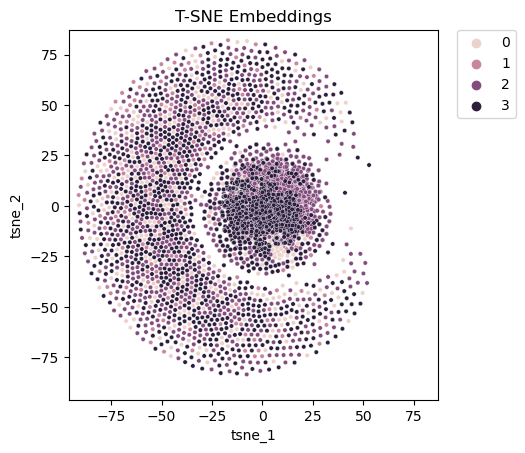

In [154]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_res[:,0], 'tsne_2': tsne_res[:,1], 'label': node_labels})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_res.min()-5, tsne_res.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_title('T-SNE Embeddings')
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)